#### Name Dipika Sharma
#### DSC 550 T302 Data Mining
#### Week 5

### Term project Milestone 1: Data Selection and EDA

#### Introduction to problem: <br>The world we are living in, is undeniably digital. Since covid 19 there is a tremendous increase in the number of users who prefer online shopping as it is convenient and easy. Most of the people use credit cards for online purchase. Credit Card offers lot of the benefits to users and one of the advantages of credit card is - it allow users to buy something even if they do not have money at that time. This feature has also increased the financial fraud. Although cybersecurity is there and plays and important role in providing digital security, but it is not easy to track down the unusual activity.

#### Solution: <br>The solution for the problem above is to find the pattern in the abnormal activity and whenever any such pattern occurs, the system will automatically abort the online transaction.

#### I am using the credit card data from Kaggle site and using the data set I will try to see if we can find any pattern. While exploring the data We will try to achieve the following <br> &emsp; a) If there is any significant correlation between the different features of the data frame. It will be nice to know if any feature has some dependency on other features. <br> &emsp; b) Will check the dataset for fraudulent transaction. It will be beneficial to know the number of fraudulent transactions out of total transaction in the dataset. <br> &emsp; c) Will try to see if there is any unbalance in credit card data with respect to target variable Class. <br> &emsp; d) We will also be exploring data for any outliers. If yes, then we will remove the outliers from the data frame so that it will not effect the credit card fraud detection model <br> &emsp; e) Will see How frequently the fraudulent transactions are happening in this dataset compare to Non fraudulent transactions.

####  Once we explore the above it will help me to build and evaluate a logistic regression model to identify fraudulent activity. This predictive model can benefit users by saving them from cyber attackers and provide secure digital world.

#### Dataset:  <br>I found the credit card dataset at below location in Kaggle website:  <br> https://www.kaggle.com/datasets/jacklizhi/creditcard  <br>This data set contained 284807 rows and 31 columns. I understand for security purpose the dataset has column names v1, v2, … v28. We have 28 features with these name. The remaining three features Time, Amount and Class using the original names. Class is the target columns when class labels is 0 then it is non-fraudulent and when it is 1 then it is fraudulent.


In [1]:
## import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import Series, DataFrame

In [2]:
## Lets check the versions of packages

print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)

pandas version: 1.3.4
numpy version: 1.20.3


## Exploring the Data

In [3]:
## Lets load the Credit card data into a dataframe.
credit_card_df = pd.read_csv('creditcard.csv')

## Lets check the first five rows of the data frame.
credit_card_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### As we can see that the credit card data transactions are coming from the real bank. This data set has 31 features and I understand for some security reason the original variables are not shared for 28 features and have renamed as v1, v2,... and v28. but the rest of the features Time, class and Amount are original variables of the data set.

In [4]:
## Lets check the dimensons of the data frame.

credit_card_df.shape

(284807, 31)

#### We can see that the credt card data frame contained 284807 rows and 31 columns.

In [5]:
## Lets look at the column data types

credit_card_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
## Lets get the summary statistics of the numerical data of the credit card data frame.

credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### As we can see we do not have any non numerical column in data frame. Since the count for all the columns is 284807 that means we do not have any mssing values in the data frames.

In [7]:
## Using info function to make sure that the data frame do not have any missing values.

credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### As we can see that all the columns have count as 284807 indicating no null values in the dataset.

## Correlation between the features

In [8]:
import seaborn as sns
from matplotlib import gridspec

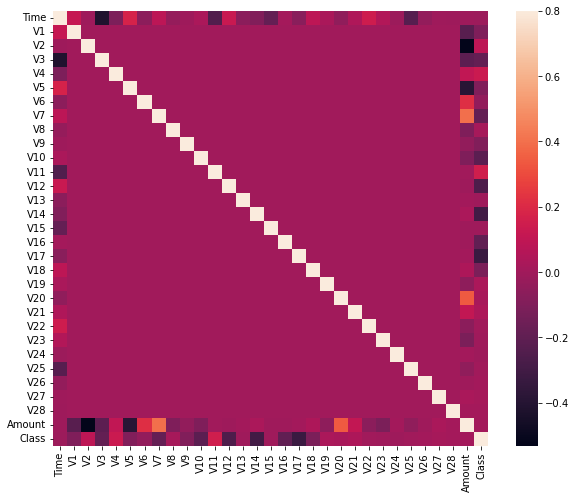

In [9]:
## next step is to see how the features in data frame are related to each other.
## Using heatmap to understand the relationship.

corr_matrix = credit_card_df.corr()
fig = plt.figure(figsize = (10, 8))

## Creating heatmap
sns.heatmap(corr_matrix, vmax = .8, square = True)
plt.show()

#### Looking at the heatmap above we can clearly say that v7 and v20 features are positively correlated to Amount. Class and Amount is negatively correlated to v3. Also we can see that V2 and V5 are negatively correlated to Amount. The features V1, V2, ... and V28 are weakly correlated to each other. Class is negatively correlated to v14, v17 and v12.

## Class Distribution

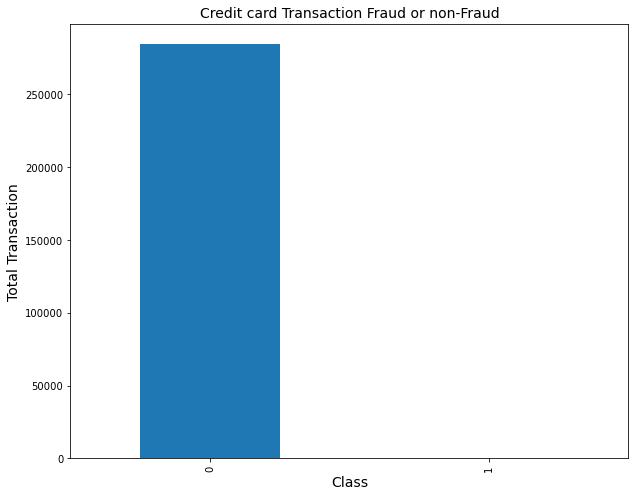

In [10]:
## Lets plot the categorical feature Class.
## class labels as 0 then it is non-fraudulent and when it is 1 then it is fraudulent

fig = plt.figure(figsize = (10, 8))

credit_card_df['Class'].value_counts().plot(kind='bar')

## Adding title to the plot
plt.title('Credit card Transaction Fraud or non-Fraud', fontsize=14) 
# Add x-axis label with font size of 14
plt.xlabel('Class', fontsize=14)
# change rotation of x-axis labels
plt.xticks(rotation=90) 
# Add y-axis label with font size of 14
plt.ylabel('Total Transaction', fontsize=14) 

plt.show()

#### The above graph show unstability in the transaction data, the Fraud transaction are very less compare to non-Fraud transactions.

## Boxplot distribution to detect outliers

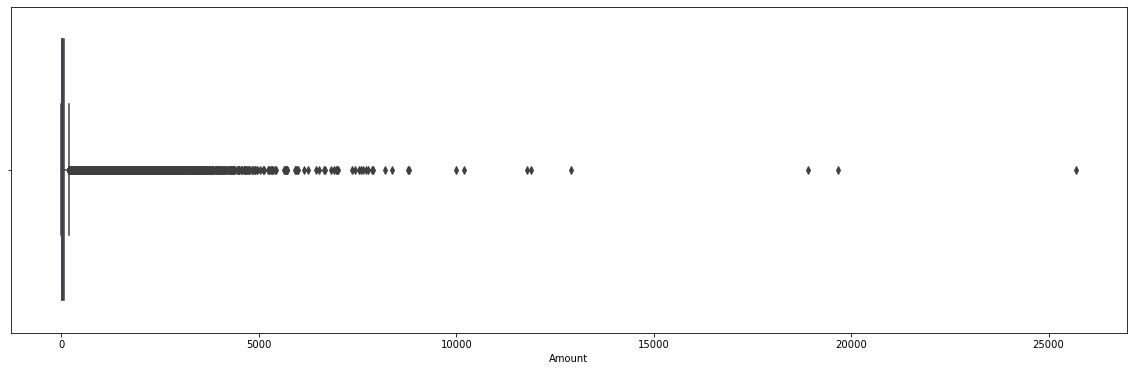

In [11]:
## Lets create the boxplot to detect the outliers in credit card transaction dataset.
fig, (ax1) = plt.subplots(1, sharex=True, figsize=(20,6))

## Boxplot for Trasaction amount
sns.boxplot(x=credit_card_df['Amount'], ax=ax1)

plt.show()

#### The above boxplot shows the prsence of lot of outliers in data which might can lead to Credit card fraud detection model to failure.

In [12]:
## Lets calculate the non-Fraud and Fraud transaction in the data frame using Class columns

## Calculating the total transaction in the data frame.
Total = len(credit_card_df)

## class labels as 0 then it is non-fraudulent and when it is 1 then it is fraudulent

## Using filter Class==0 to calculate non-fraud transaction in the data frame.
non_Fraud = len(credit_card_df[credit_card_df.Class == 0])

## Using filter Class==1 to calculate fraud transaction in the data frame.
Fraud = len(credit_card_df[credit_card_df.Class == 1])

print('The total number of Transactions in the credit card data frame is {}'.format(Total))
print('The number of Non-Fraud transactions in the credit card data frame is {}'.format(non_Fraud))
print('The number of Fraud transactions in the credit card data frame is {}'.format(Fraud))

The total number of Transactions in the credit card data frame is 284807
The number of Non-Fraud transactions in the credit card data frame is 284315
The number of Fraud transactions in the credit card data frame is 492


In [13]:
## Lets calculate the percentage of the fraud transactions out of the total transactions.

Fraud_percentage = round(Fraud/non_Fraud*100, 2)
print('The percentage of Fraud transactions out of the total transactions is {}'.format(Fraud_percentage))

The percentage of Fraud transactions out of the total transactions is 0.17


#### 17% of the total transaction are fraud.

#### We can clearly see that out of 284807 transactions, 492 are fraud and 284315 are non-fraud transactions. The Fraud transaction are very less compare to non fraud transaction, if we simply go ahead and removed the outliers there is a chance that we might loss some fraudulent transaction which we cannot afford if we need to build predictive model.

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

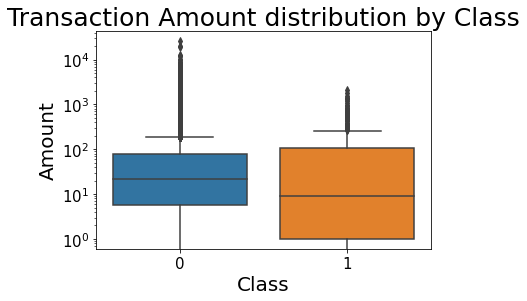

In [14]:
## Lets create the boxplot to understand the distribution of Transaction amount by class

plt.figure()
plt.yscale('log')
sns.set_context({"figure.figsize": (10, 8)})

## Creating boxplot
dist = sns.boxplot(data = credit_card_df, x = 'Class', y = 'Amount')

## Setting the title fo the boxplot
plt.title("Transaction Amount distribution by Class", fontsize=25)

## Setting the x axis and y axis label for the boxplot
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)

#### Boxplot helps us to identfy the outliers and gave us better understanding of outliers that whether it is require to remove outliers from the data or not. Outliers are considered to be any value coming outside of the 1.5 times of the Inter-Quartile range. But with credit card data set where the fraud transaction are only 17% compare to the total transactions it would be not a good idea to remove all the outliers of the data. So instead of removing all the outliers data points we will be focusing only on the extreme outliers.

#### Looking at the box plot we can cleary see that we do not have outliers for fraud transactions after 3000 but outliers in non fraud transaction is quite visible and present even after 10000. Lets consider any amount beyond to 10000 as extreme outliers and we will be creating the dataset after removing the extreme outliers.

In [15]:
## Lets build the dataframe after removing outliers that have transaction amount beyond 10000.

credit_card_df = credit_card_df[credit_card_df.Amount <= 10000]

In [16]:
## Lets calculate the non-Fraud and Fraud transaction in the data frame using Class columns again after removing the outliers.

## Calculating the total , fraud, non fraud transaction in the data frame.
print('The total number of Transactions in the credit card data frame is {}'.format(len(credit_card_df)))
print('The number of Non-Fraud transactions in the credit card data frame is {}'.format(len(credit_card_df[credit_card_df.Class == 0])))
print('The number of Fraud transactions in the credit card data frame is {}'.format(len(credit_card_df[credit_card_df.Class == 1])))

## Checking the percentage of fraud transaction against total transaction again after removing outliers.
print('The percentage of Fraud transactions out of the total transactions is {}'.format(round(len(credit_card_df[credit_card_df.Class == 1])/len(credit_card_df[credit_card_df.Class == 0])*100, 2)))

The total number of Transactions in the credit card data frame is 284800
The number of Non-Fraud transactions in the credit card data frame is 284308
The number of Fraud transactions in the credit card data frame is 492
The percentage of Fraud transactions out of the total transactions is 0.17


#### As expected we not seeing much changes in the non fraud transaction and fraud transaction after removing outliers from the data frame.

## Credit card transaction time by Class

In [17]:
## Lets import the required libraries

import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [18]:
## Creating the displot data by Class variable
non_fraud = credit_card_df.loc[credit_card_df['Class'] == 0]["Time"]
fraud = credit_card_df.loc[credit_card_df['Class'] == 1]["Time"]

## Grouping data together.
hist_data = [non_fraud, fraud]

## Creating the labels for displot data as per Class.
group_labels = ['Non-Fraudulent', 'Fraudulent']

## Create distplot
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)

## Lets add the tite to the curve
fig.update_layout(title_text='Credit Card Transactions by Class')

## Addig the xaxix and y axis title.
fig['layout'].update(xaxis=dict(title='Time'), yaxis=dict(title='Transactions'))

fig.show()

#### Looking at the above graph we can see that Fraudulent transactions are evenly distributed in time compare to Non-Fraudulent transactions. There are some time when very less number of Non-Fraudulent transactions happened but the Fraudulent transactions are almost remained constant

## Fraudulent and Non-Fraudulent transactions Amount
### It would be interesting to see How the Fraudulent and Non-Fraudulent transaction are distributed by Amount. Using these graphs we can see How much money withdraws during Fraudulent transactions.

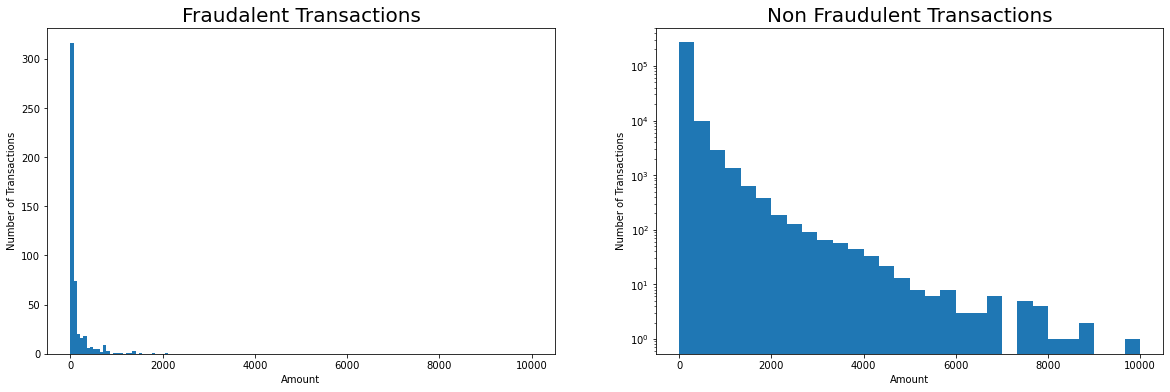

In [19]:
## Lets create the histogram for Fraudulent and Non Fraudulent transaction side by side.
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(20,6))

## Creating the data for histogram by Class.
non_fraud = credit_card_df.loc[credit_card_df['Class'] == 0]["Amount"]
fraud = credit_card_df.loc[credit_card_df['Class'] == 1]["Amount"]

## Histogram for Fraudulent Transactions
ax1.hist(fraud, bins = 30)

## Setting the title for Fraudulent transactions
ax1.set_title('Fraudalent Transactions', fontsize=20)

## Setting the x-axis and y-axis labels for Fraudulent transactions.
ax1.set_xlabel('Amount')
ax1.set_ylabel('Number of Transactions') 

## Histogram for Non Fraudulent Transactions
ax2.hist(non_fraud, bins = 30)

## Setting the title for Non Fraudulent transactions
ax2.set_title('Non Fraudulent Transactions', fontsize=20)

## Setting the x-axis and y-axis labels for Non Fraudulent transactions.
ax2.set_xlabel('Amount')
ax2.set_ylabel('Number of Transactions') 

plt.yscale('log')
plt.show()

#### Both above graph is righ skewed and the Amount withdraws with Fraudulent transactions is very less compare to Non Fraudulent transaction. This also indicate that with respect to Class variable, the Credit card data is unbalanced.

#### It would be nice to know if zero money withdraw in any of the Fraudulent transaction. Lets check for both Fraudulent and Non Fraudulent transactions to get better insight of the data.

In [20]:
## Creating the dataframe to see how many zero Amount transactions happened in dataframe by Class.

df = credit_card_df.query("Amount==0").groupby(["Class"]).count().reset_index()
df.Amount

0    1798
1      27
Name: Amount, dtype: int64

In [21]:
## Lets calculate the percentage of zero amount transaction out of total transaction in dataframe.

print('The percentage of No amount Fraud transactions is {}'.format(df.Amount[1]*100/credit_card_df.shape[0]))
print('The percentage of No amount Non-Fraud transactions is {}'.format(df.Amount[0]*100/credit_card_df.shape[0]))

The percentage of No amount Fraud transactions is 0.009480337078651686
The percentage of No amount Non-Fraud transactions is 0.6313202247191011


#### No amount transactions indicate the presence of some data errors. Assuming why would someone use the credit card for zero amount transactions. Although the percentage for Fraud zero amount transaction is very less as .009% and Non Fraud zero amount transaction is .63%.

### Conclusion
#### While working on the credit card data set I have following observation: <br> &emsp;&emsp; a) Using the heatmap I found the features V1, V2, ... and V28 are weakly correlated to each other and they do not have much dependency on others. But we do find that Class and Amount variable are positively and negatively correlated to some of the features like V2, V3, V5, V7, V14, V17 and V12. <br> &emsp;&emsp; b) I used bar graph analysis to find out the number of fraud trasaction against the total number of transactions. We saw that the fraud transaction are very less compare to valid non fraud transactions. This also raise a question if the dataset is best fit or not as the training set is seems to be very small. <br> &emsp;&emsp; c) Next I used the boxplot to find out the outliers in the data set for amount varaible. Outliers can mislead the results for predictive model. Since we have less fraud transaction data I prefer to remove outliers that are extreme and have transaction amount exceeds from 10000. It is not changing the dataset much but will definitly increase the accuracy of the result of our model. <br> &emsp;&emsp; d) I used the denity plot to see pattern in fraud and valid non fraud transactions. I observed that fraud transactions are quite consistent compare to non fraud transactions. <br> &emsp;&emsp; e) Next i used histogram to find out if there is any unbalanced in amount data when comes to fraud transaction and non raud transaction. Histogram help me to understand that the transaction amount during fraudulent transaction is very less compare to the amount transfered in non fraudulent transactions. I also noticed that zero amount transaction happened for both fraud and non fraud transactions. although the number of transaction with no amount is very less but it indicate the presence of some data errors in the dataset. 